### Explore Exercises

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
from env import host, user, password
import wrangle

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def new_telco_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [25]:
df = new_telco_data()
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)


In [26]:
# prepare telco
df.drop_duplicates(inplace = True)
df = df.replace(r'^\s*$', np.nan, regex = True)
df.total_charges = df.total_charges.astype('float64')
df.senior_citizen = df.senior_citizen.replace({0:'No', 1:'Yes'})
df.dropna(inplace = True)
df = df.drop(columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id'])
df.replace(to_replace = {'No phone service':'No', 'No internet service':'No'}, inplace = True)

In [27]:
train_and_validate, test = train_test_split(df, random_state = 123)
train, validate = train_test_split(train_and_validate)
test.shape, train.shape, validate.shape

((1758, 20), (3955, 20), (1319, 20))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 6022 to 489
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3955 non-null   object 
 1   senior_citizen         3955 non-null   object 
 2   partner                3955 non-null   object 
 3   dependents             3955 non-null   object 
 4   tenure                 3955 non-null   int64  
 5   phone_service          3955 non-null   object 
 6   multiple_lines         3955 non-null   object 
 7   online_security        3955 non-null   object 
 8   online_backup          3955 non-null   object 
 9   device_protection      3955 non-null   object 
 10  tech_support           3955 non-null   object 
 11  streaming_tv           3955 non-null   object 
 12  streaming_movies       3955 non-null   object 
 13  paperless_billing      3955 non-null   object 
 14  monthly_charges        3955 non-null   float64
 15  to

In [28]:
cols = list(df.columns)

In [29]:
obj_cols = train.select_dtypes(include = 'object')
num_cols = train.select_dtypes(exclude = 'object')

In [11]:
num_cols

,tenure,monthly_charges,total_charges
6022,3,19.90,45.75
5518,4,57.20,223.75
1432,47,75.45,3545.10
2924,72,114.50,8331.95
5860,4,18.85,84.20
...,...,...,...
3781,43,55.55,2342.20
71,8,49.85,365.55
4252,20,50.00,1003.05
567,22,83.05,1799.30


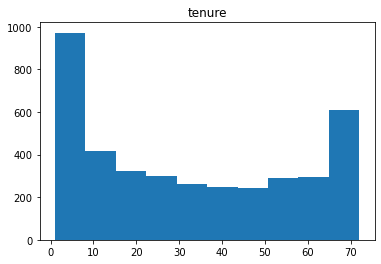

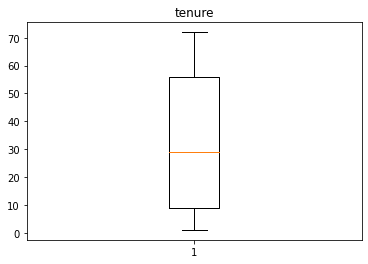

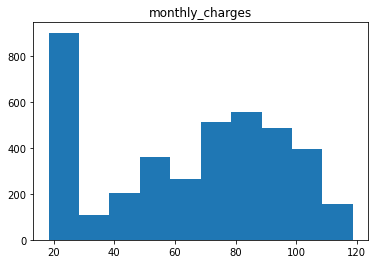

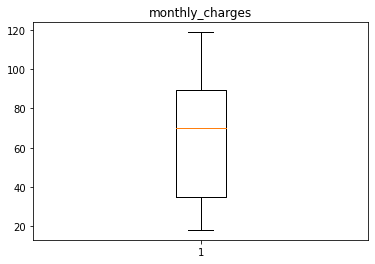

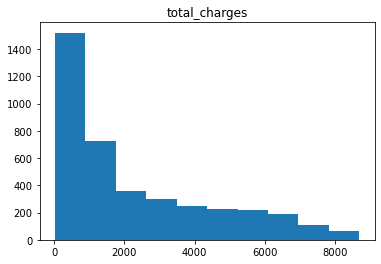

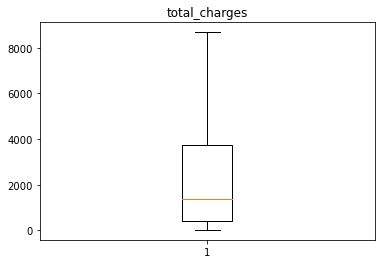

In [14]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show();

In [16]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3955.0,32.345638,24.530526,1.00,9.0,29.0,56.000,72.00
monthly_charges,3955.0,64.488382,29.931667,18.25,35.2,70.3,89.450,118.75
total_charges,3955.0,2255.024842,2244.467535,18.85,399.8,1381.8,3722.775,8684.80


In [17]:
num_cols.corr()

,tenure,monthly_charges,total_charges
tenure,1.000000,0.231495,0.824883
monthly_charges,0.231495,1.000000,0.641295
total_charges,0.824883,0.641295,1.000000


<AxesSubplot:>

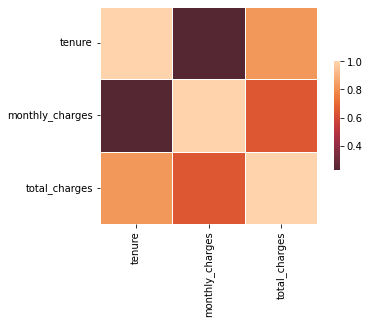

In [18]:
sns.heatmap(num_cols.corr(), center = 0, square = True, linewidths = .5, cbar_kws = {'shrink': .5})

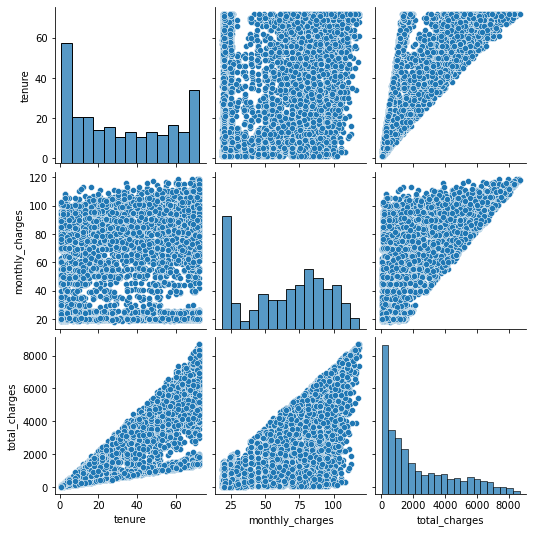

In [20]:
sns.pairplot(num_cols)

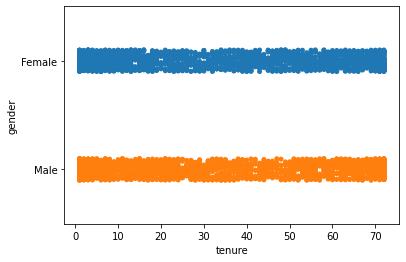

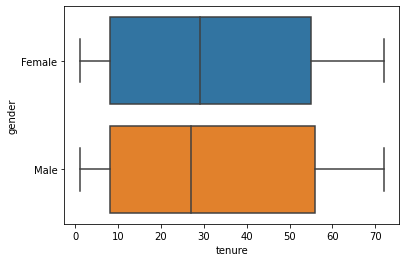

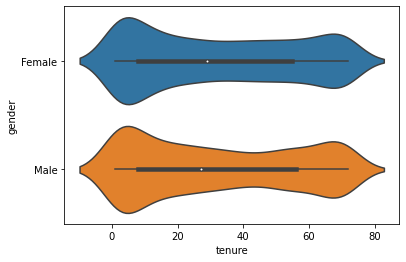

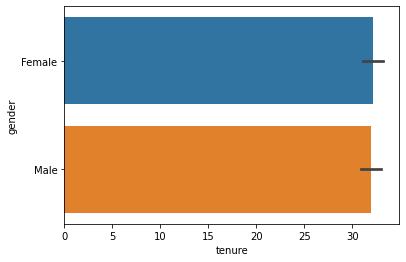

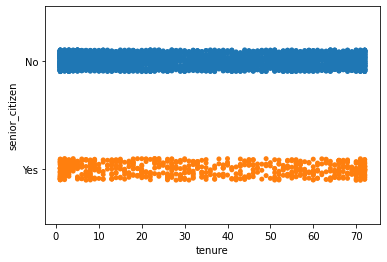

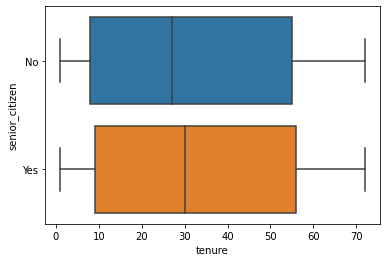

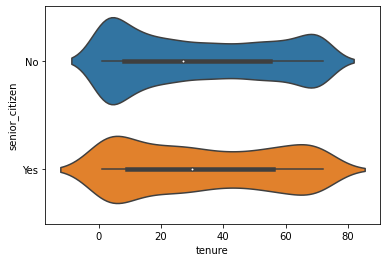

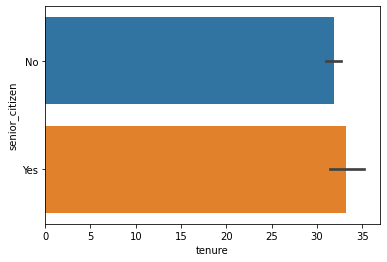

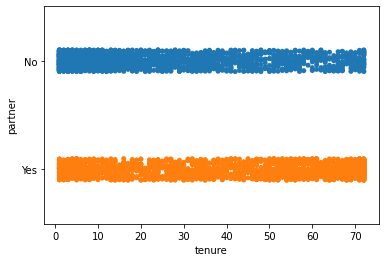

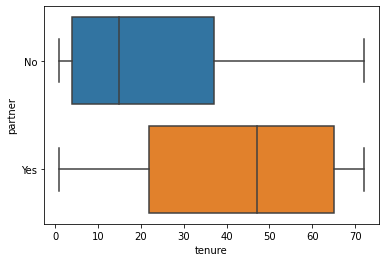

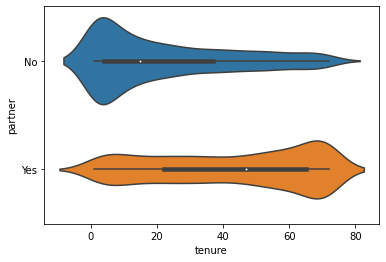

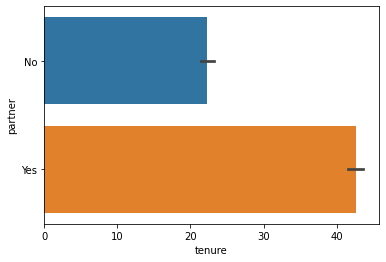

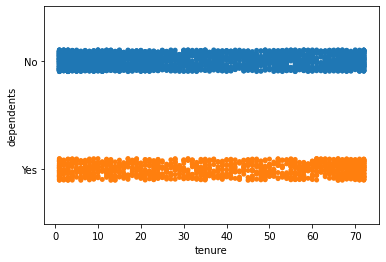

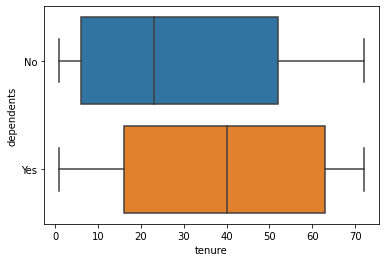

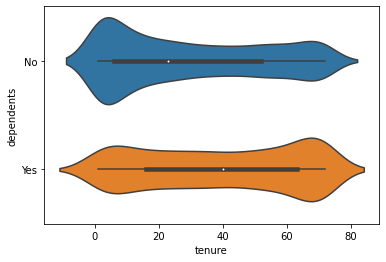

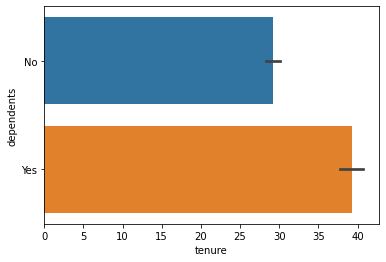

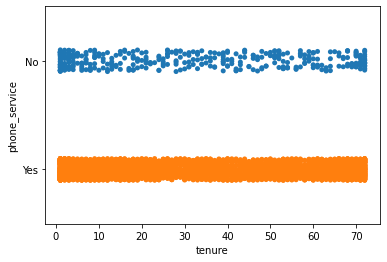

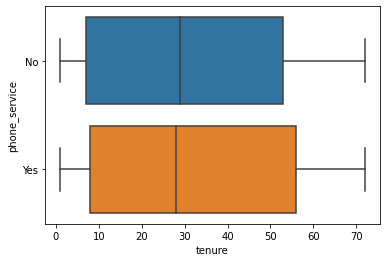

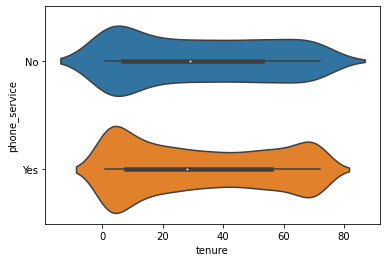

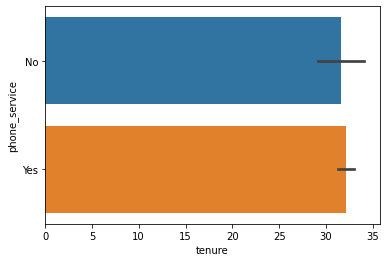

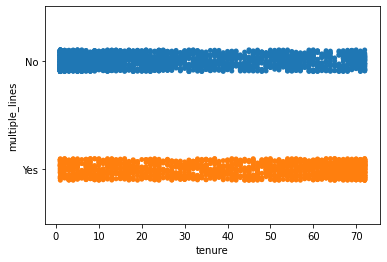

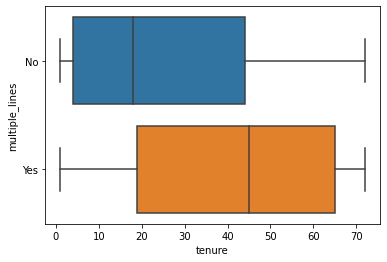

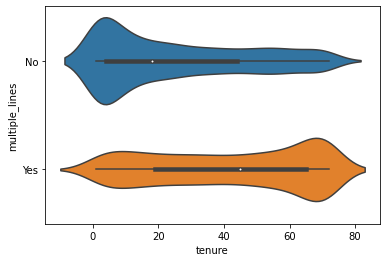

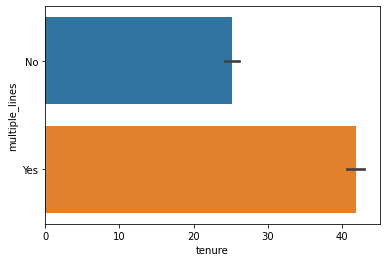

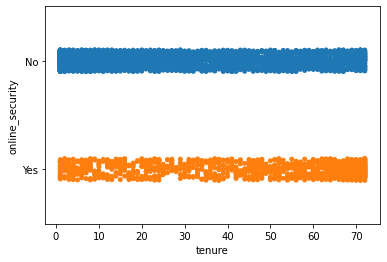

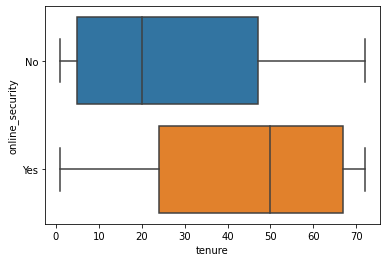

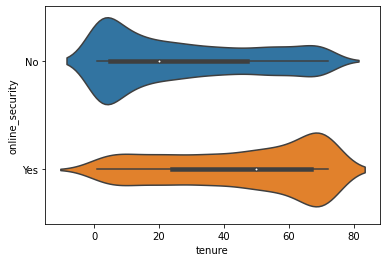

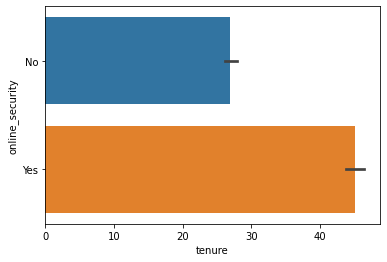

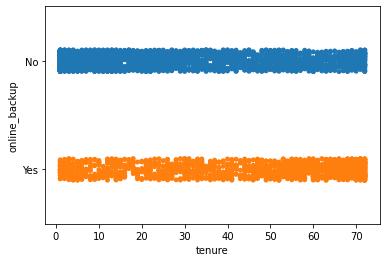

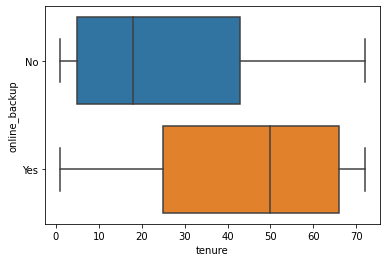

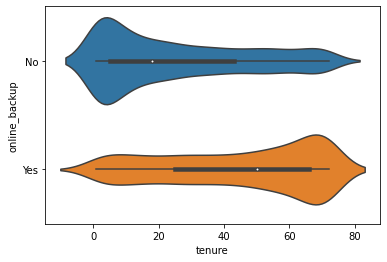

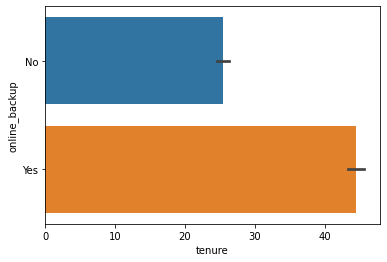

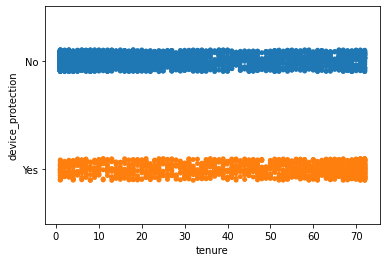

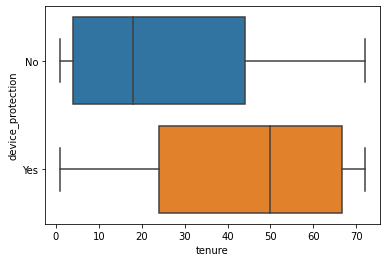

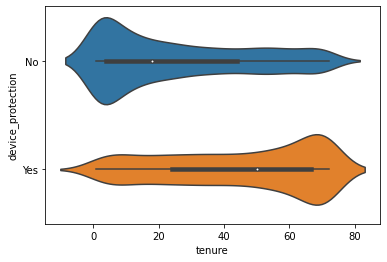

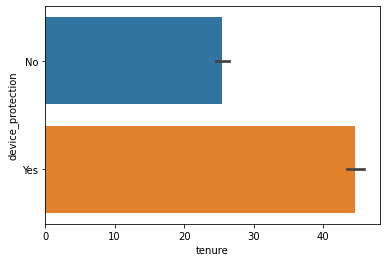

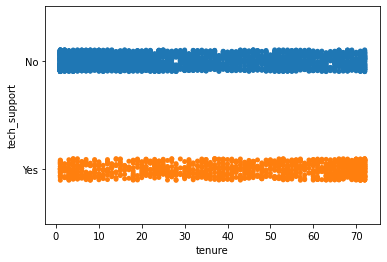

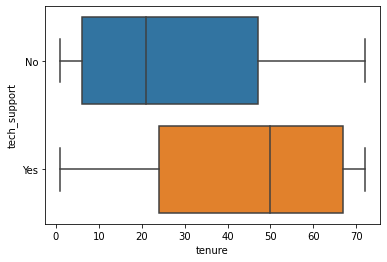

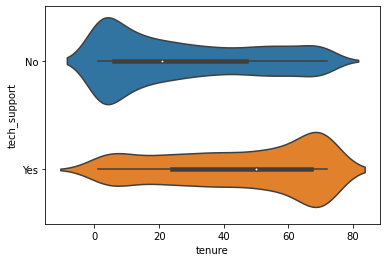

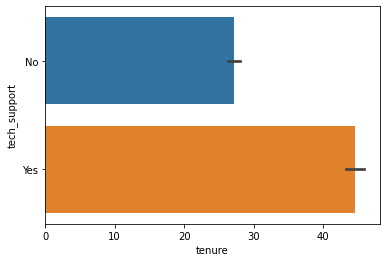

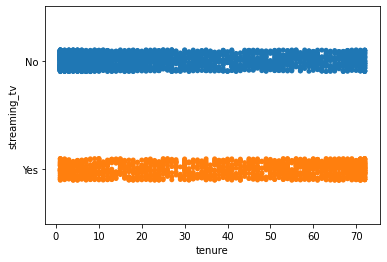

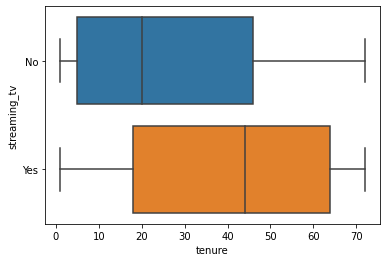

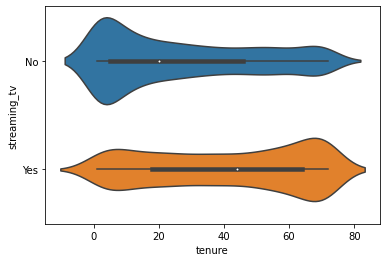

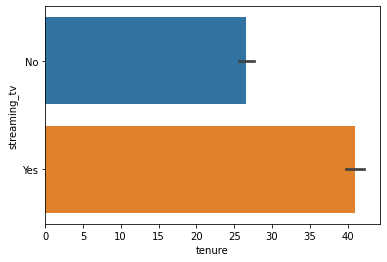

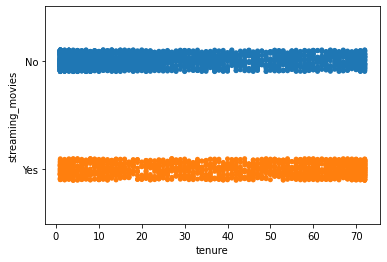

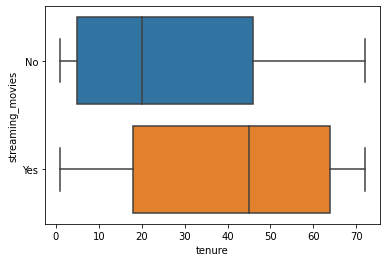

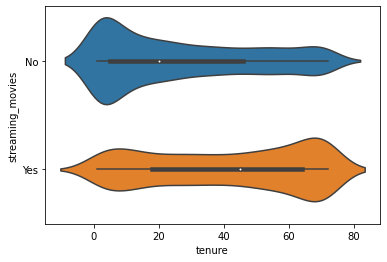

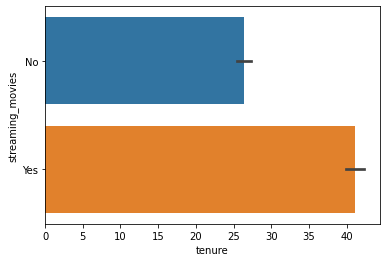

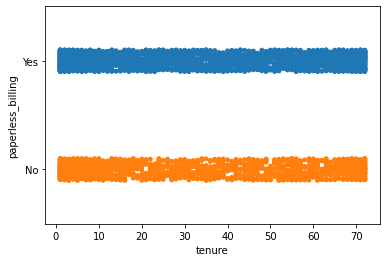

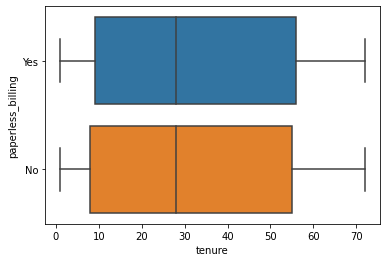

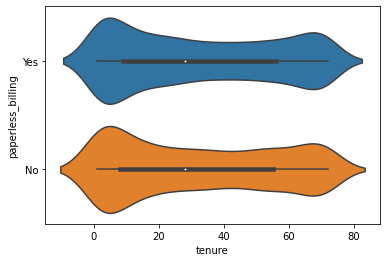

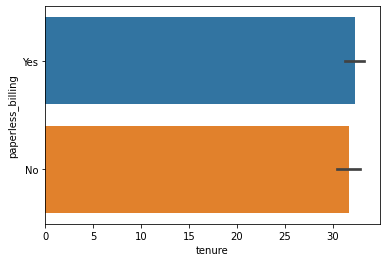

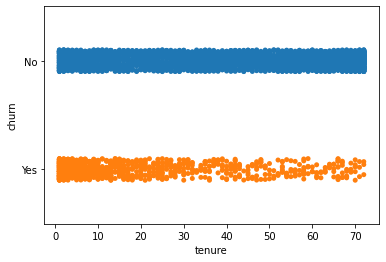

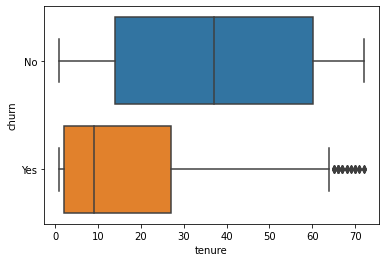

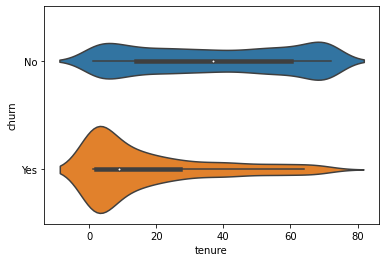

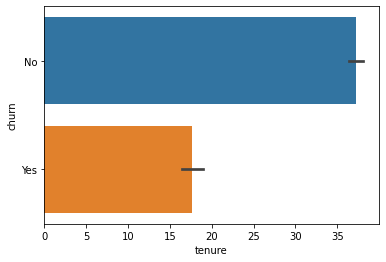

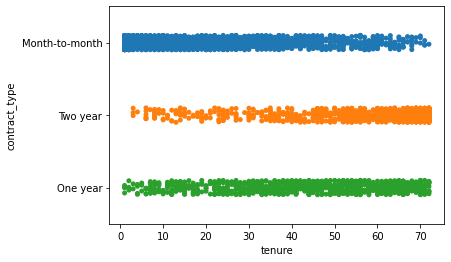

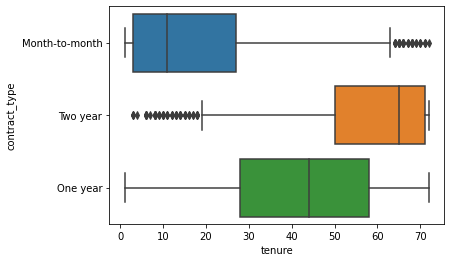

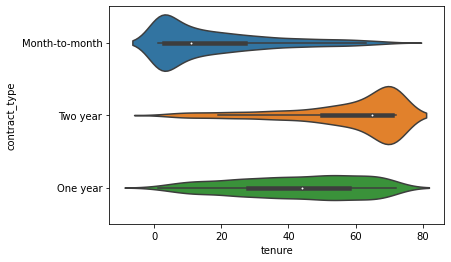

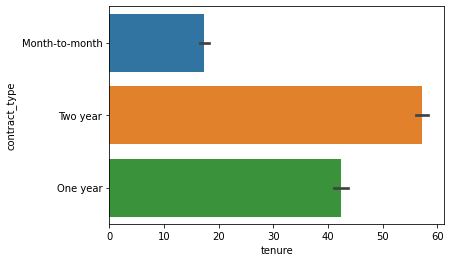

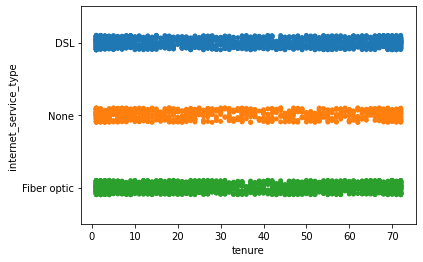

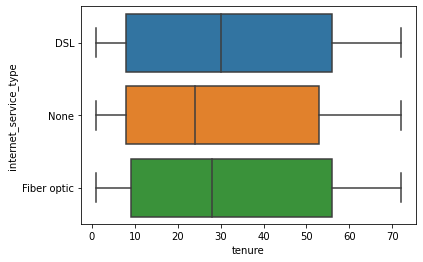

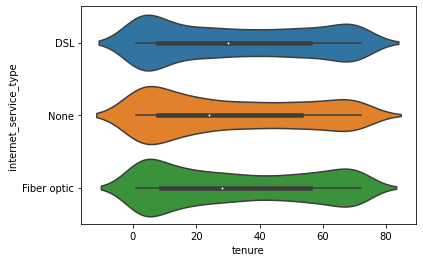

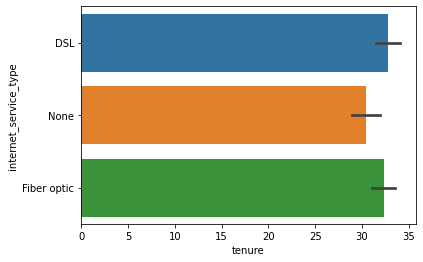

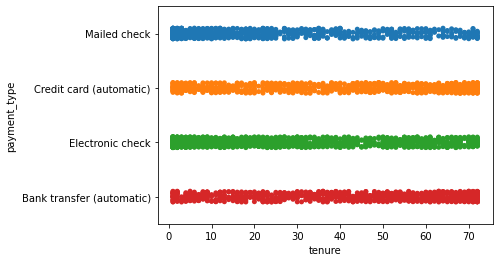

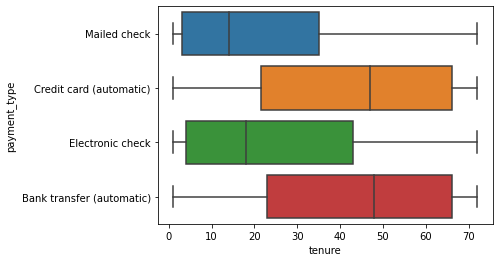

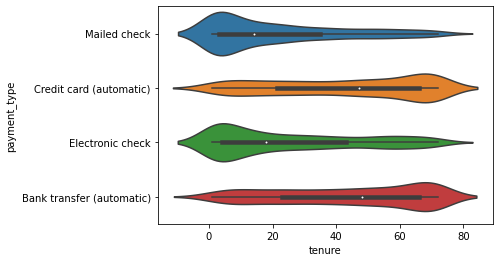

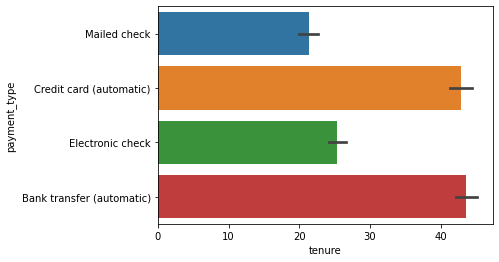

In [35]:
for col in obj_cols:
    sns.stripplot(x = train.tenure, y = train[col], data = train)
    plt.show()
    sns.boxplot(x = train.tenure, y = train[col], data = train)
    plt.show()
    sns.violinplot(x = train.tenure, y = train[col], data = train)
    plt.show()
    sns.barplot(x = train.tenure, y = train[col], data = train)
    plt.show();

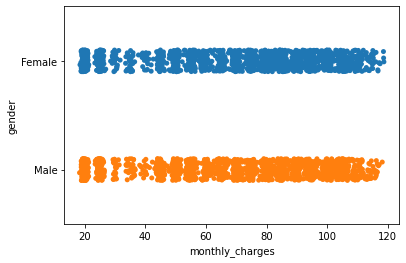

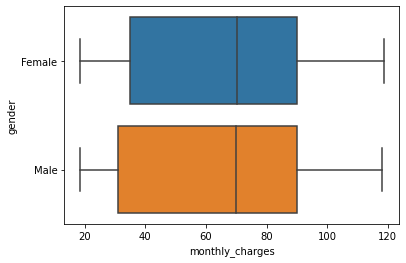

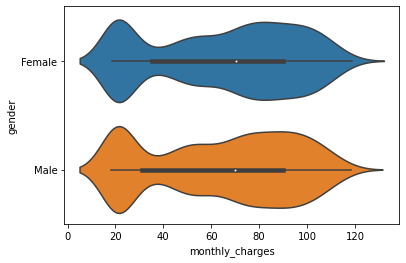

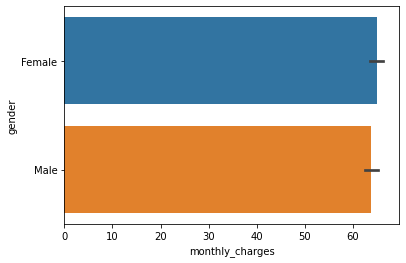

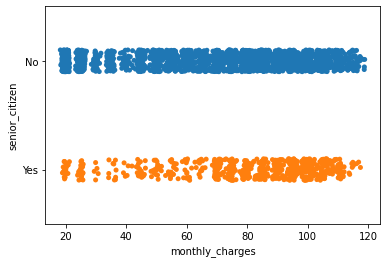

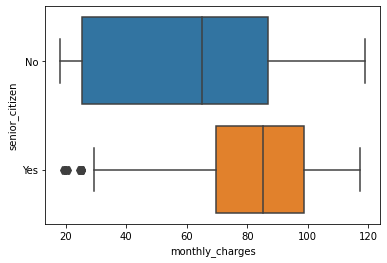

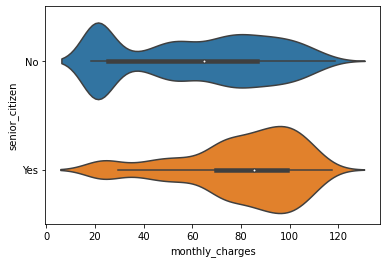

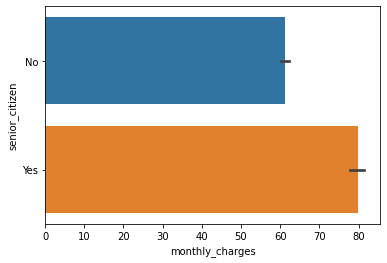

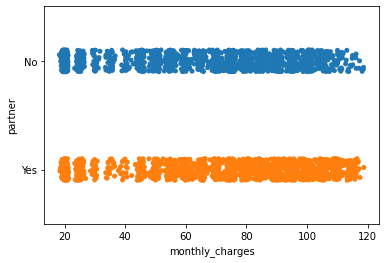

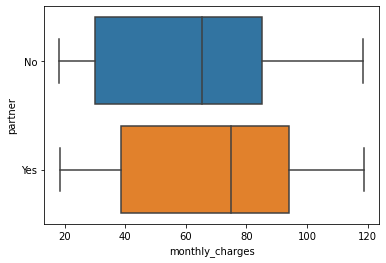

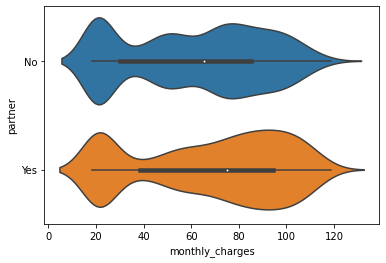

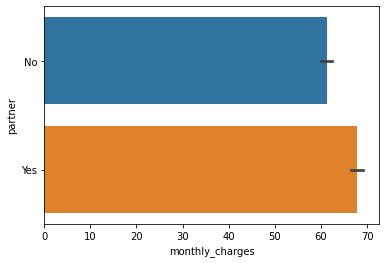

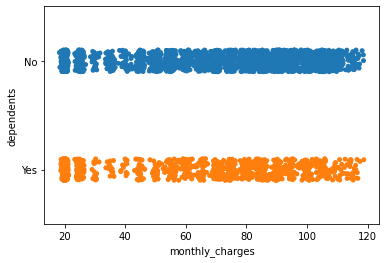

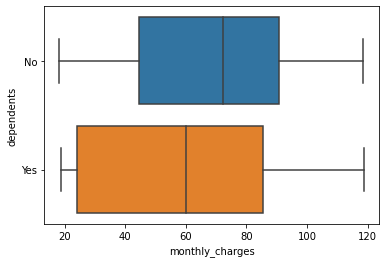

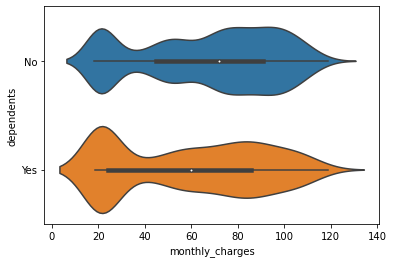

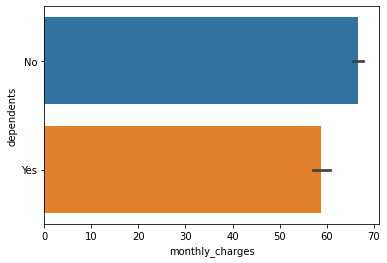

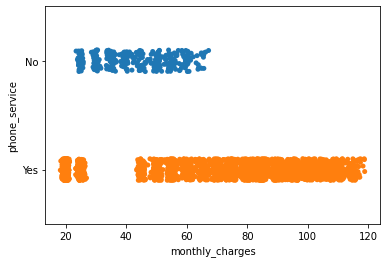

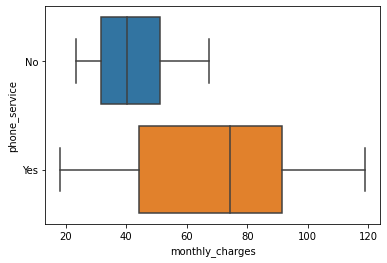

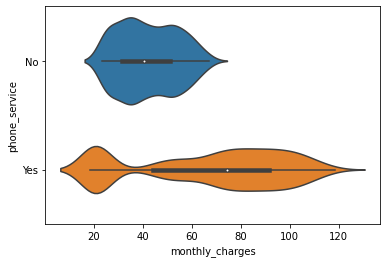

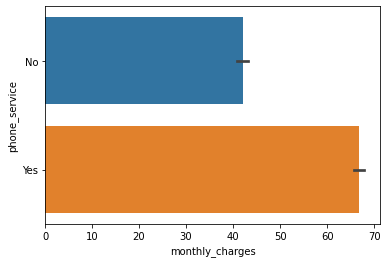

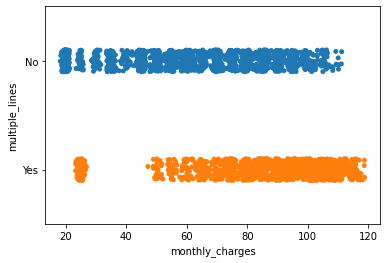

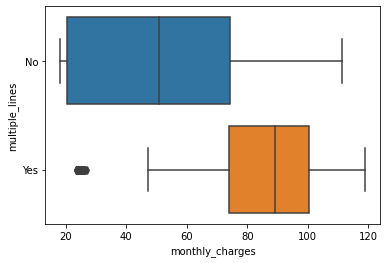

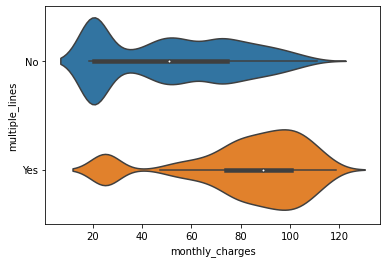

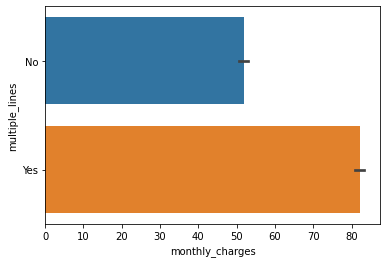

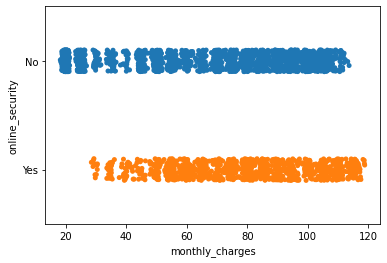

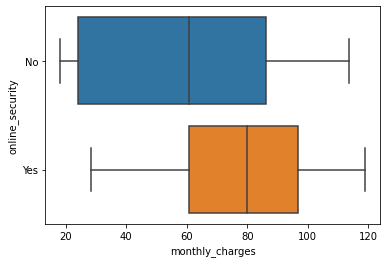

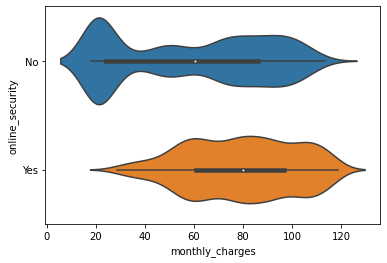

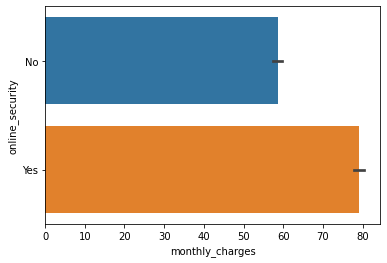

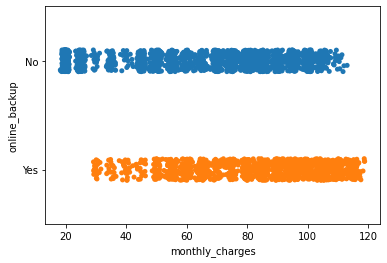

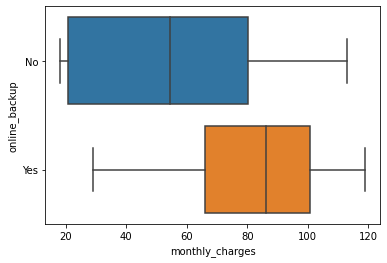

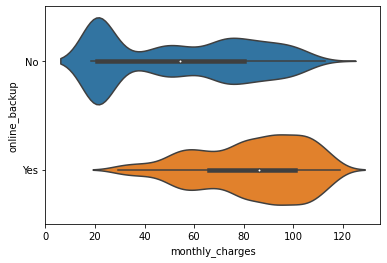

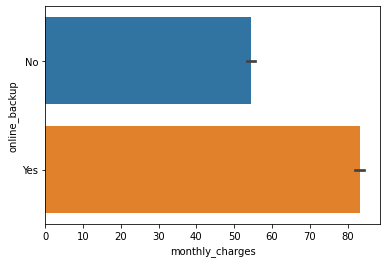

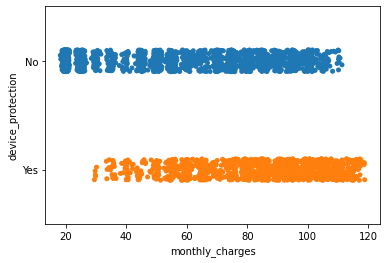

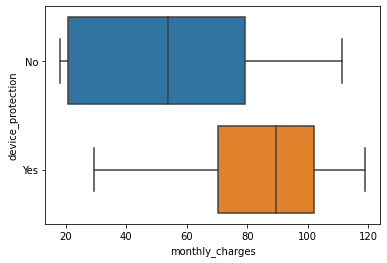

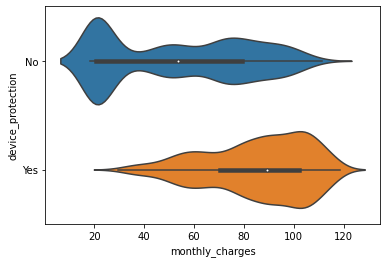

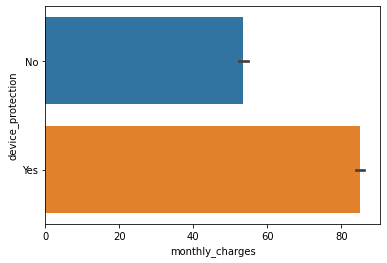

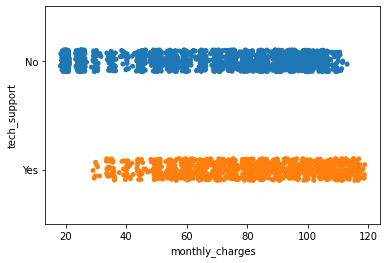

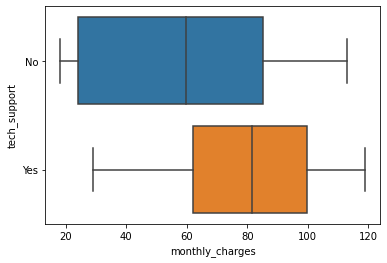

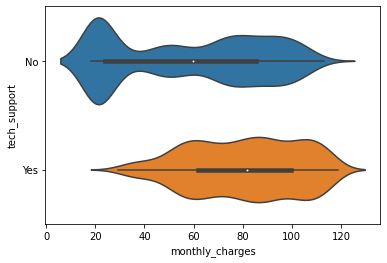

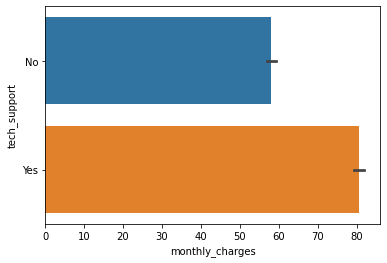

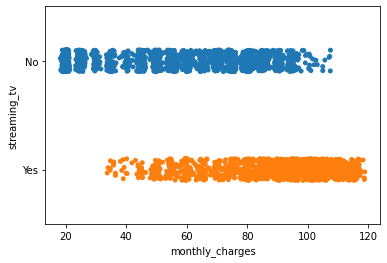

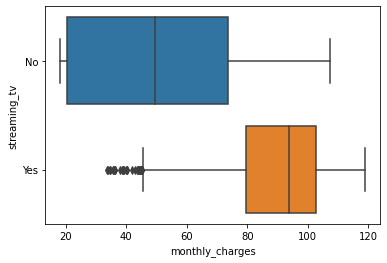

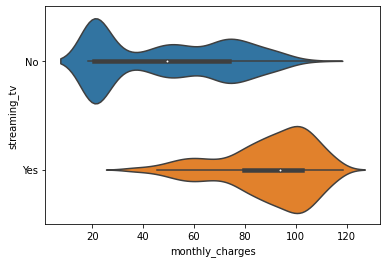

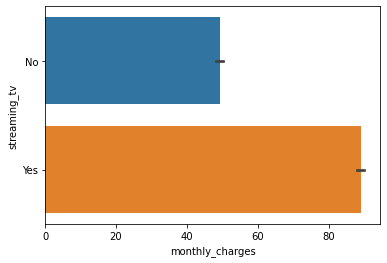

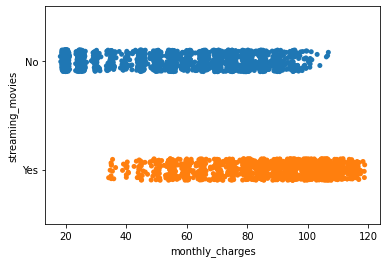

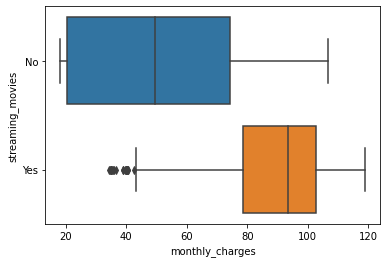

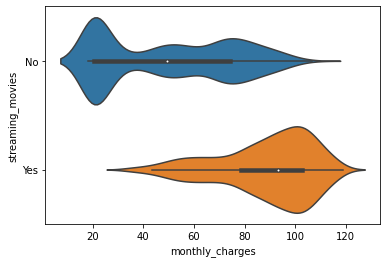

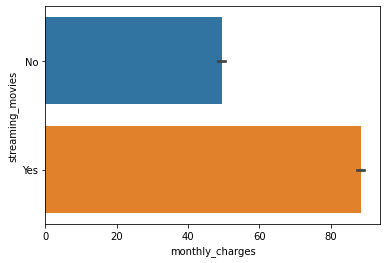

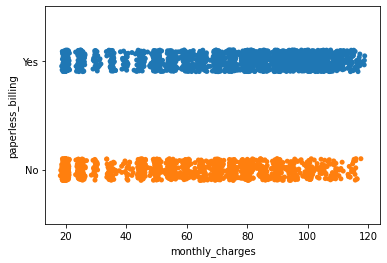

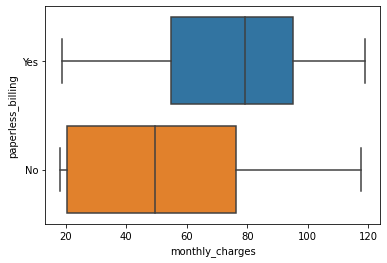

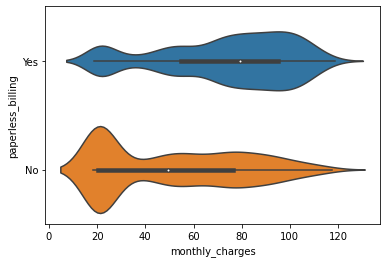

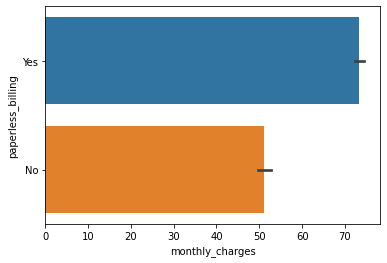

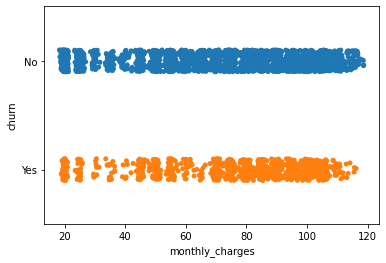

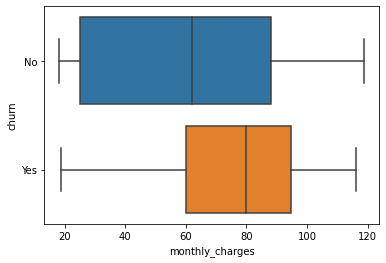

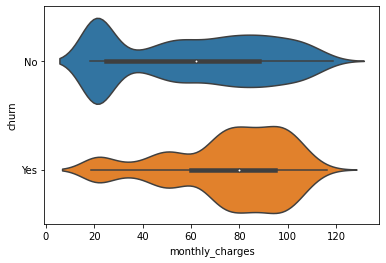

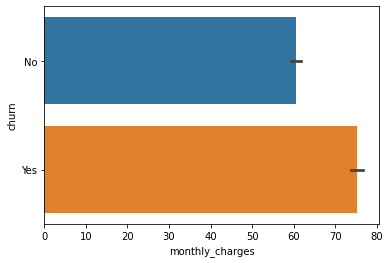

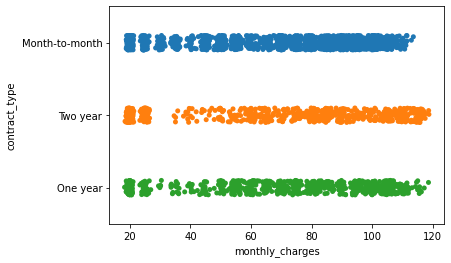

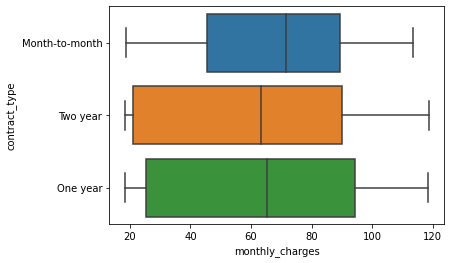

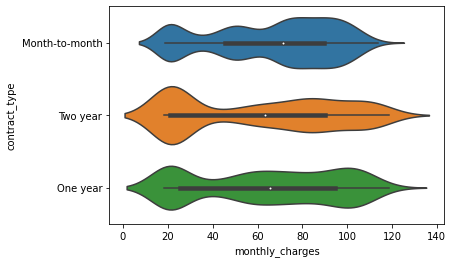

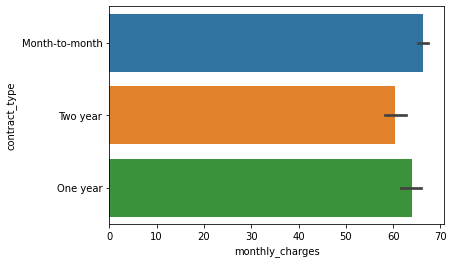

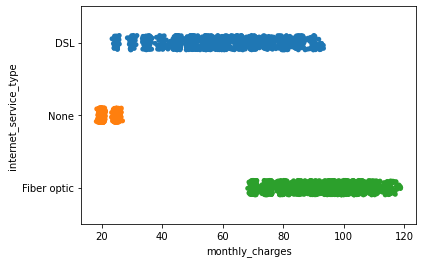

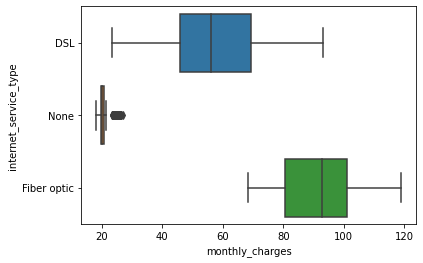

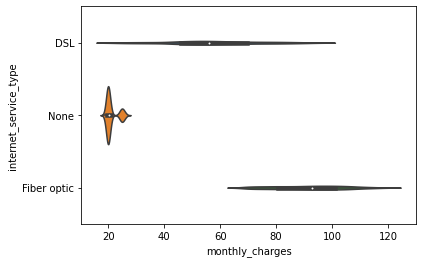

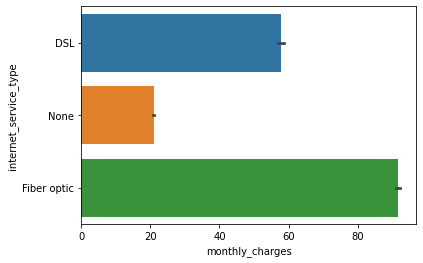

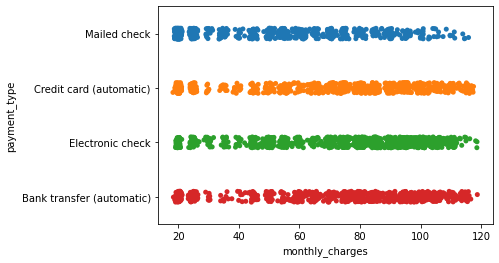

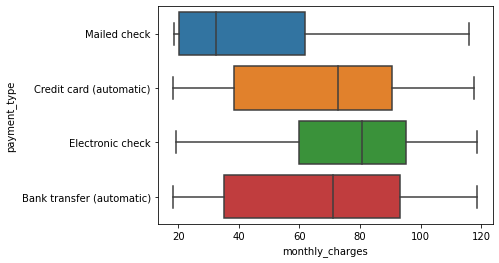

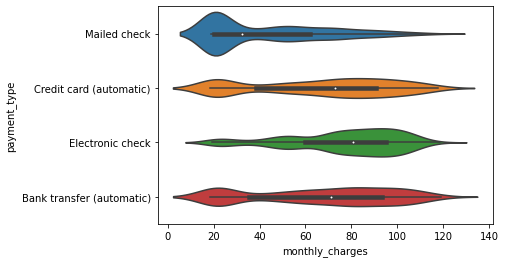

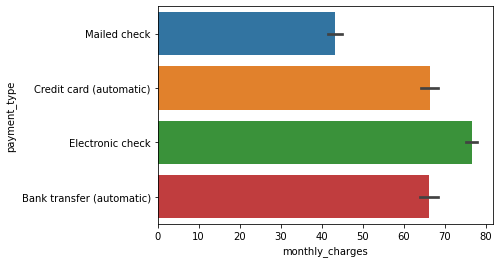

In [37]:
for col in obj_cols:
    sns.stripplot(x = train.monthly_charges, y = train[col], data = train)
    plt.show()
    sns.boxplot(x = train.monthly_charges, y = train[col], data = train)
    plt.show()
    sns.violinplot(x = train.monthly_charges, y = train[col], data = train)
    plt.show()
    sns.barplot(x = train.monthly_charges, y = train[col], data = train)
    plt.show();

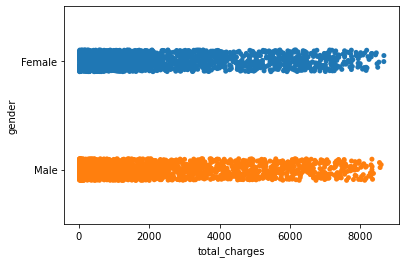

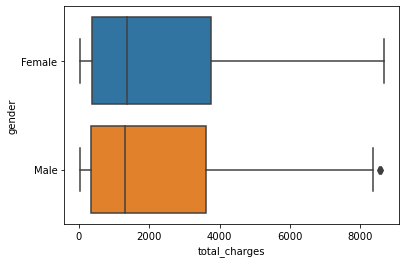

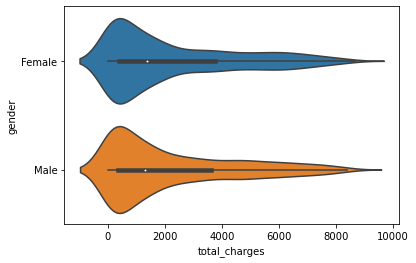

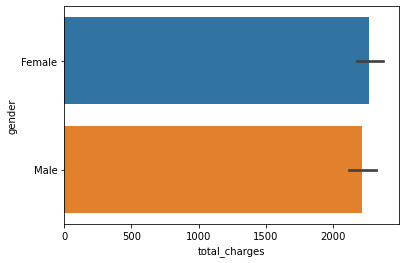

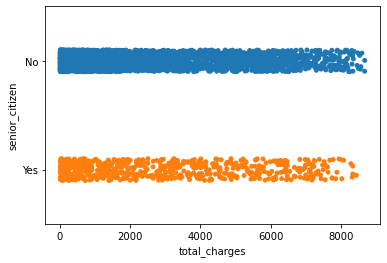

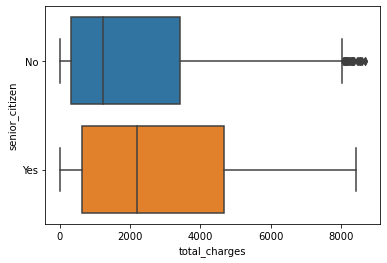

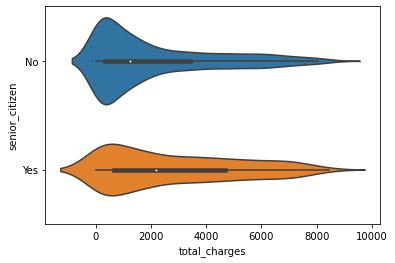

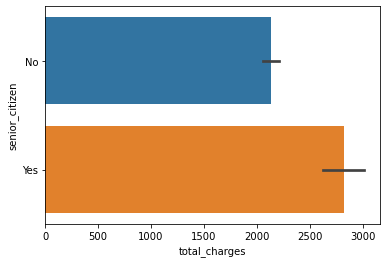

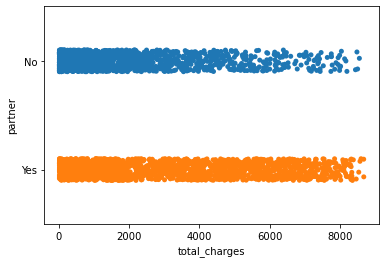

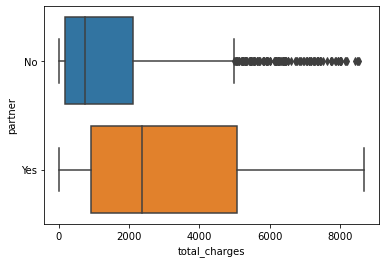

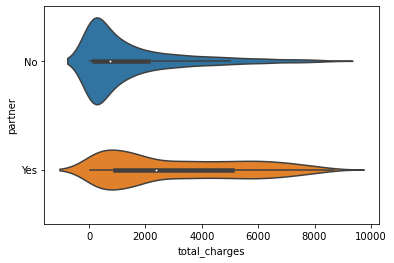

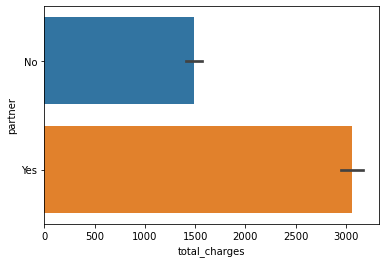

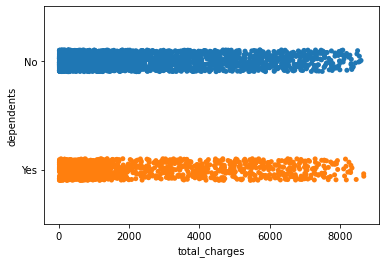

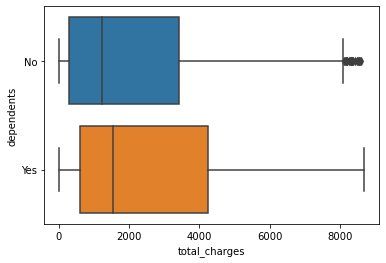

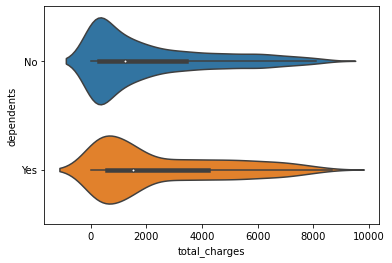

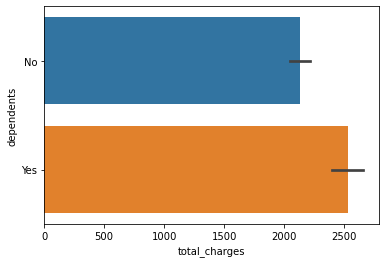

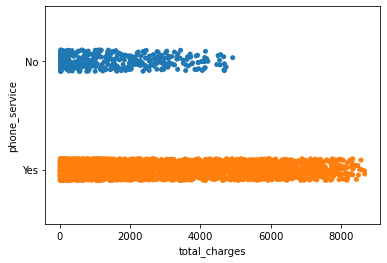

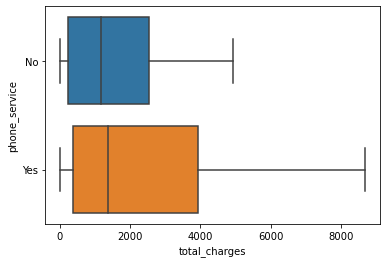

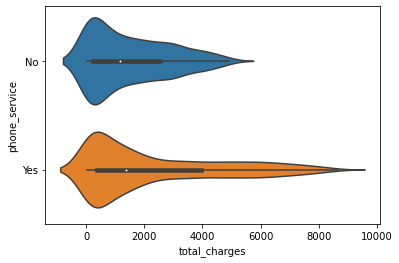

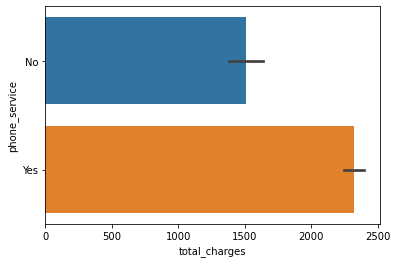

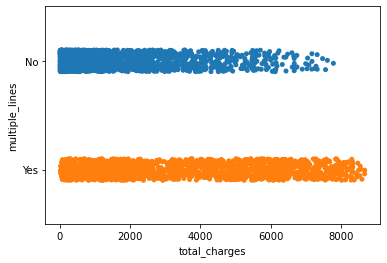

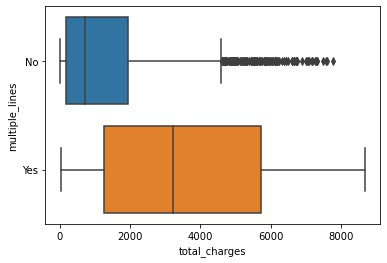

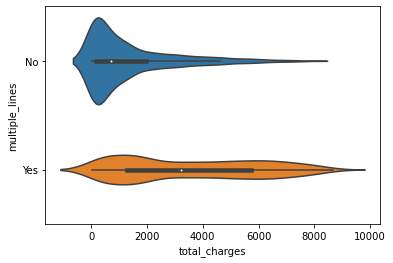

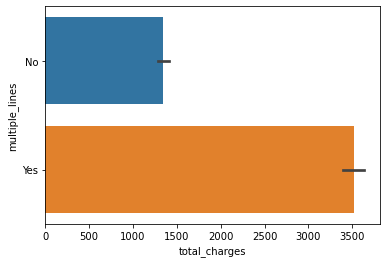

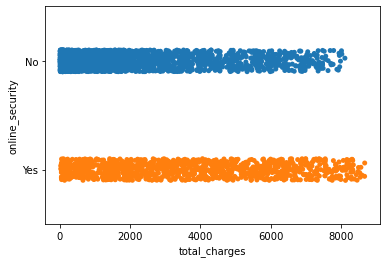

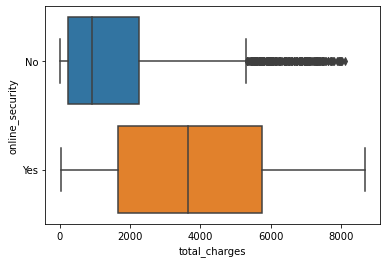

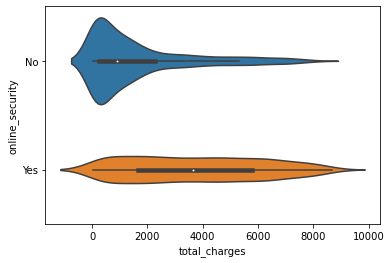

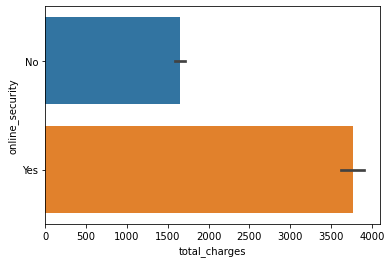

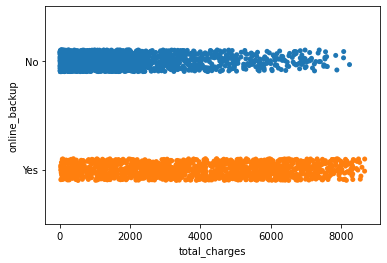

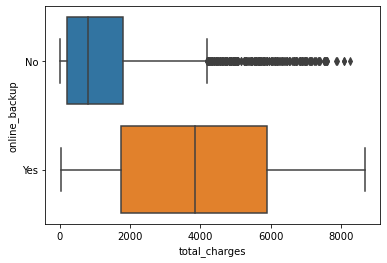

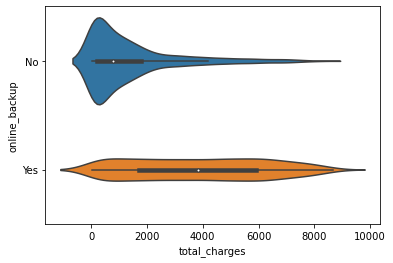

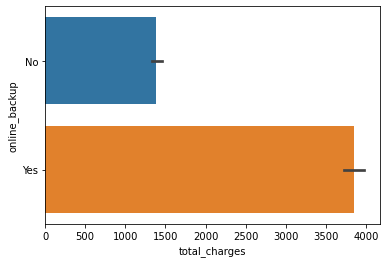

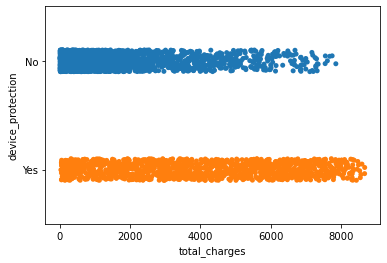

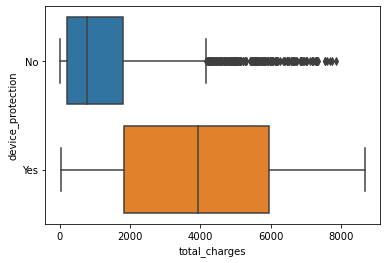

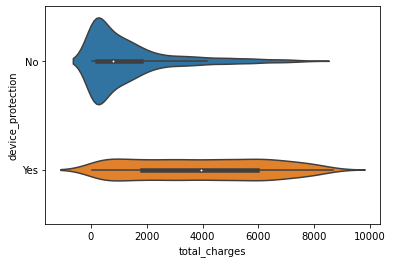

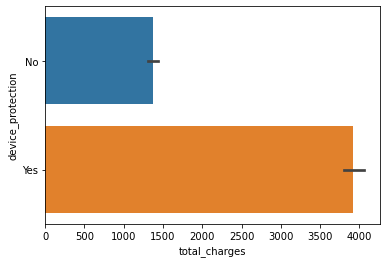

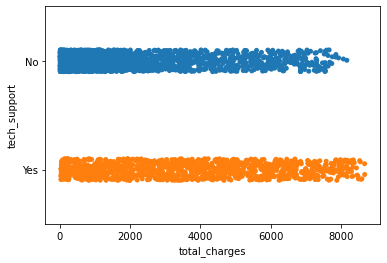

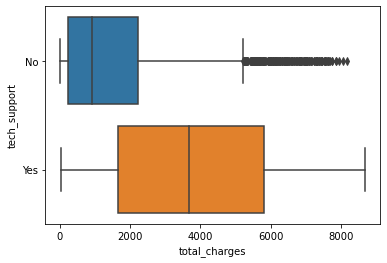

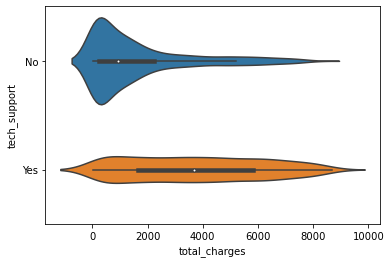

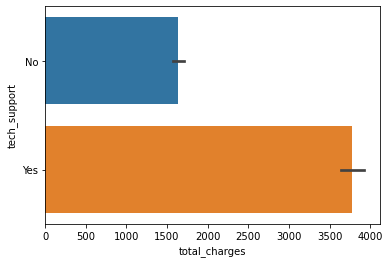

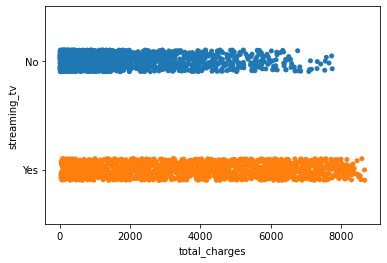

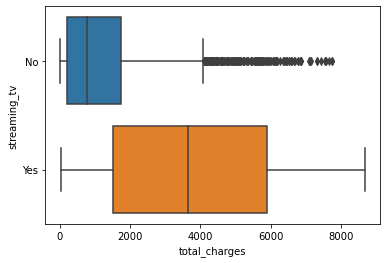

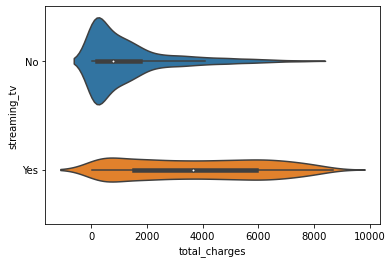

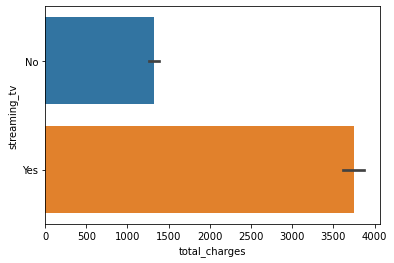

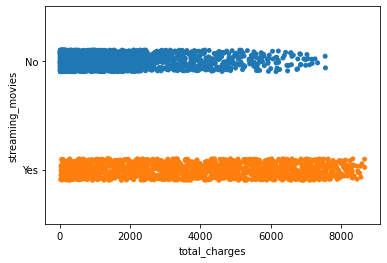

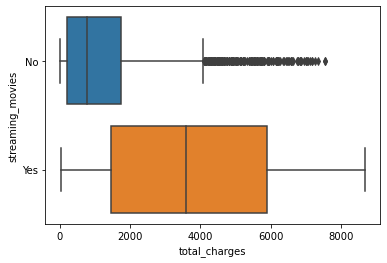

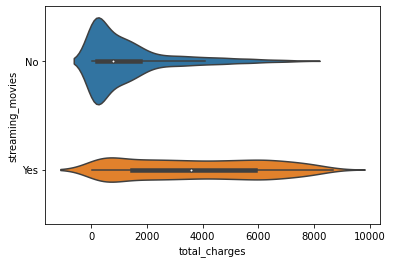

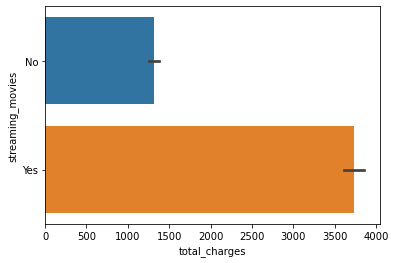

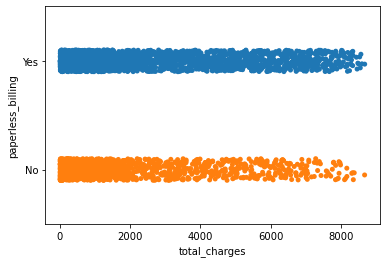

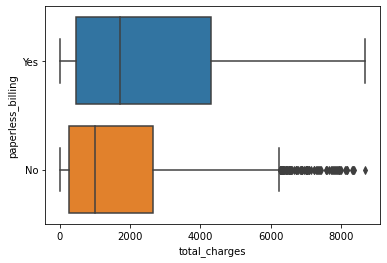

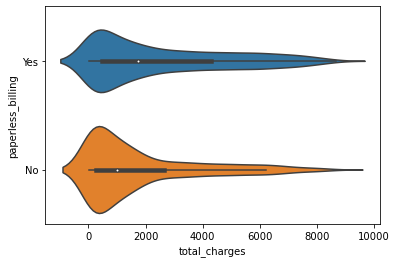

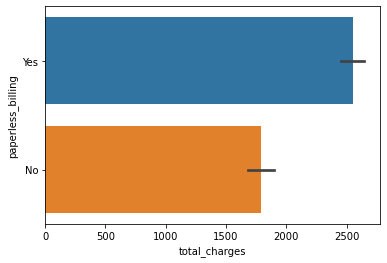

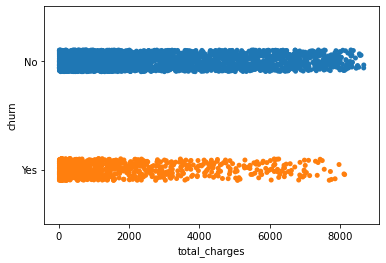

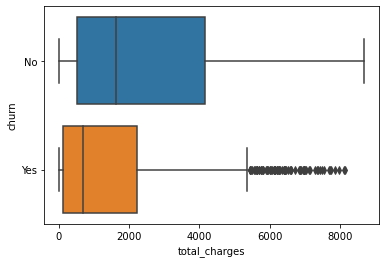

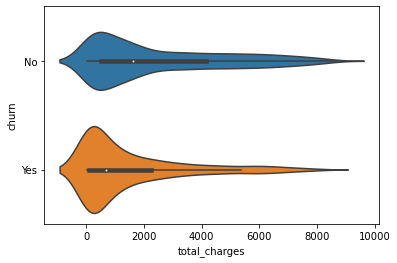

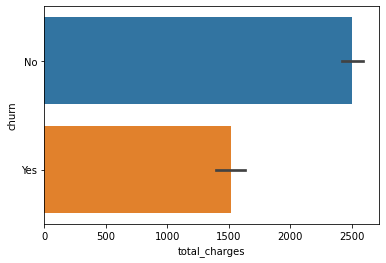

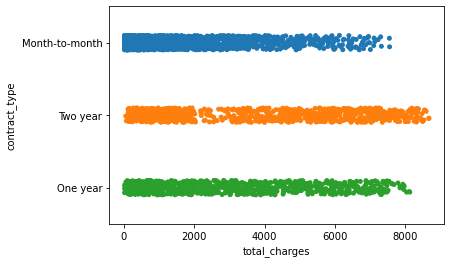

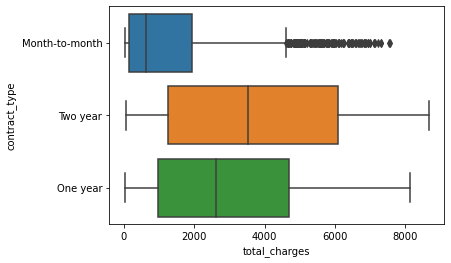

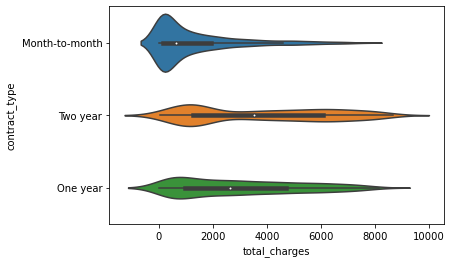

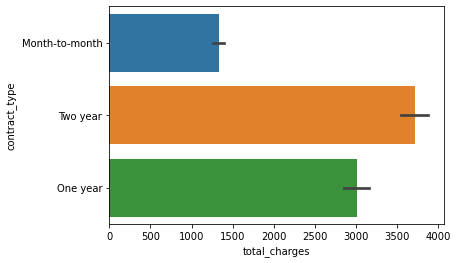

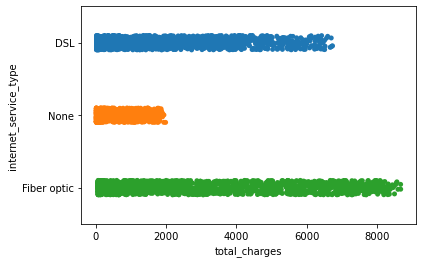

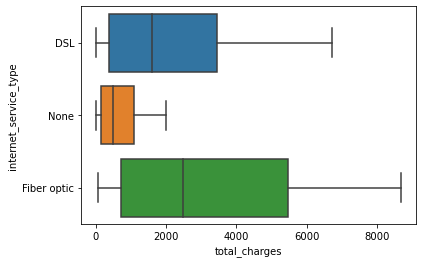

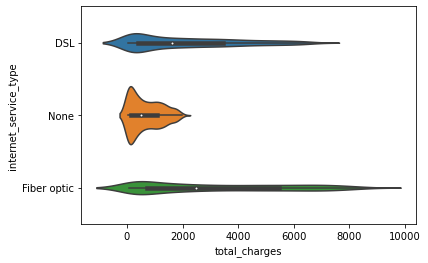

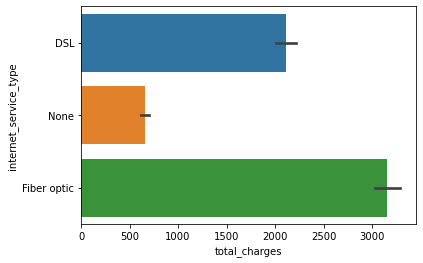

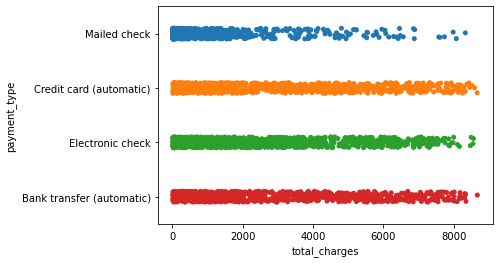

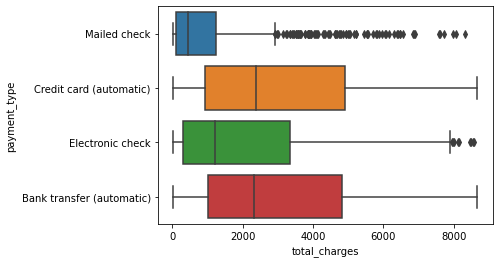

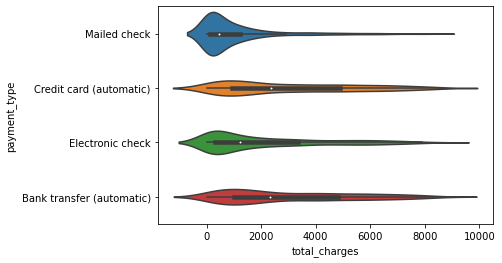

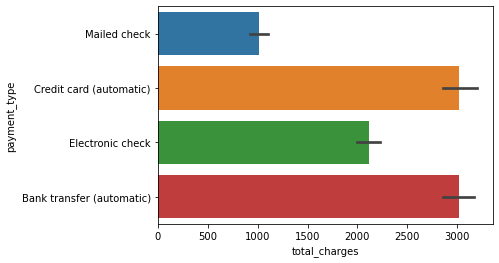

In [36]:
for col in obj_cols:
    sns.stripplot(x = train.total_charges, y = train[col], data = train)
    plt.show()
    sns.boxplot(x = train.total_charges, y = train[col], data = train)
    plt.show()
    sns.violinplot(x = train.total_charges, y = train[col], data = train)
    plt.show()
    sns.barplot(x = train.total_charges, y = train[col], data = train)
    plt.show();

In [48]:
for col in obj_cols:
    print('-----------------------------------')
    print(col, 'crosstab')
    print(pd.crosstab(train[col], train.churn))
    print('-----------------------------------')

-----------------------------------
gender crosstab
churn     No  Yes
gender           
Female  1428  535
Male    1488  504
-----------------------------------
-----------------------------------
senior_citizen crosstab
churn             No  Yes
senior_citizen           
No              2535  759
Yes              381  280
-----------------------------------
-----------------------------------
partner crosstab
churn      No  Yes
partner           
No       1381  674
Yes      1535  365
-----------------------------------
-----------------------------------
dependents crosstab
churn         No  Yes
dependents           
No          1944  874
Yes          972  165
-----------------------------------
-----------------------------------
phone_service crosstab
churn            No  Yes
phone_service           
No              301   84
Yes            2615  955
-----------------------------------
-----------------------------------
multiple_lines crosstab
churn             No  Yes
multiple_lines

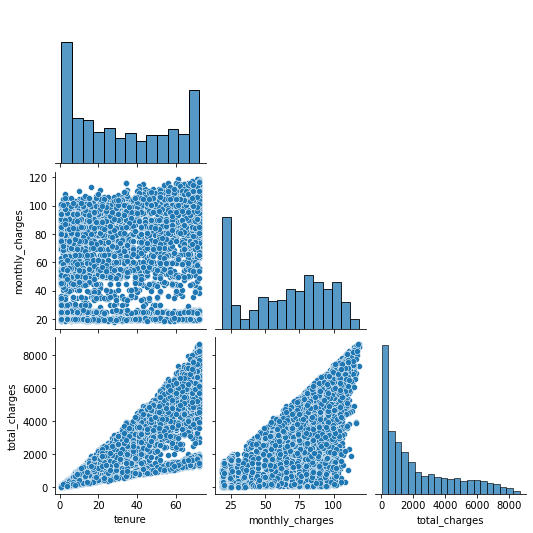

In [50]:
sns.pairplot(num_cols, corner = True)

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

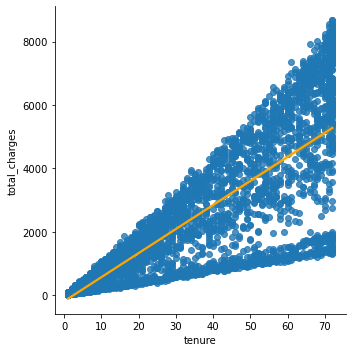

In [54]:
sns.lmplot(x = 'tenure', y = 'total_charges', data = train, line_kws = {'color':'orange'})
plt.show()

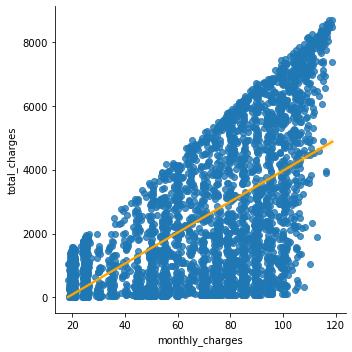

In [55]:
sns.lmplot(x = 'monthly_charges', y = 'total_charges', data = train, line_kws = {'color':'orange'})
plt.show()

In [63]:
def plot_variable_pairs(df):
    sns.lmplot(x = 'tenure', y = 'total_charges', data = df, line_kws = {'color':'orange'})
    plt.show()
    sns.lmplot(x = 'monthly_charges', y = 'total_charges', data = df, line_kws = {'color':'orange'})
    plt.show()

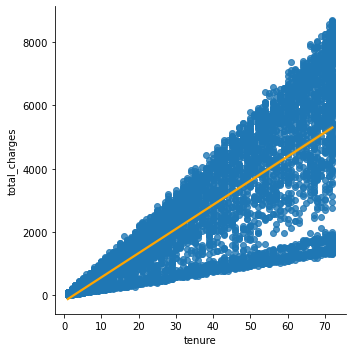

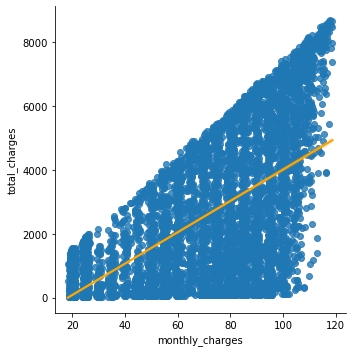

In [64]:
plot_variable_pairs(df)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [61]:
def months_to_years(df):
    df['tenure_years'] = df.tenure/12
    return df

In [62]:
df = months_to_years(df)

df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_years
0,Female,No,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,5.416667
1,Male,No,No,No,54,No,No,Yes,No,No,...,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),4.500000
2,Female,No,No,No,56,No,No,Yes,Yes,Yes,...,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),4.666667
3,Male,No,Yes,Yes,20,No,No,Yes,No,Yes,...,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1.666667
4,Male,No,Yes,No,72,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,Yes,Yes,1,Yes,No,No,No,No,...,No,No,No,20.05,20.05,No,Month-to-month,None,Mailed check,0.083333
7039,Female,No,No,No,19,Yes,No,No,No,No,...,No,No,No,19.90,367.55,No,Month-to-month,None,Mailed check,1.583333
7040,Female,No,No,No,6,Yes,No,No,No,No,...,No,No,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic),0.500000
7041,Male,No,No,No,1,Yes,No,No,No,No,...,No,No,No,18.90,18.90,No,Month-to-month,None,Mailed check,0.083333


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable

In [ ]:
obj_cols = train.select_dtypes(include = 'object')
num_cols = train.select_dtypes(exclude = 'object')

In [ ]:
for num_col in num_cols:
    for obj_col in obj_cols:
        

In [75]:
def plot_categorical_and_continuous_vars(df, a, b):
    sns.stripplot(x = df[a], y = df[b], data = df)
    plt.show()
    sns.boxplot(x = df[a], y = df[b], data = df)
    plt.show()
    sns.violinplot(x = df[a], y = df[b], data = df)
    plt.show()

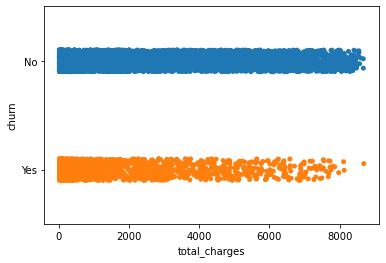

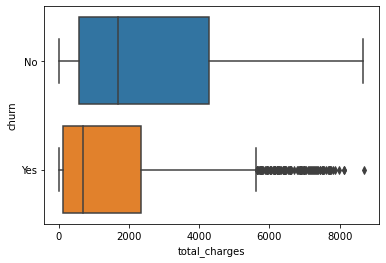

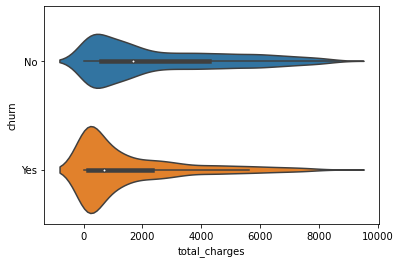

In [76]:
plot_categorical_and_continuous_vars(df, 'total_charges', 'churn')

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [77]:
def mall_customers_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    
    return df

In [78]:
df = mall_customers_data()
df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
